## Ej 2. Problema de clasificación end-to-end (5 pts)

En esta última semana se va a poner en práctica todos los conocimientos adquiridos a lo largo de este módulo: deberás desarrollar un modelo neuronal para la clasificación de imágenes de frutas que ofrezca el mayor *accuracy* posible. No hay más indicaciones o limitaciones que las siguientes:
- El dataset a utilizar será el siguiente: [https://www.kaggle.com/datasets/sshikamaru/fruit-recognition/data](https://www.kaggle.com/datasets/sshikamaru/fruit-recognition/data).
- Has de reutilizar un modelo neuronal utilizando PyTorch, tú decides el grado de reutilización. Ideas:
  - Modelos de PyTorch Hub. [https://pytorch.org/hub/](https://pytorch.org/hub/)
  - Modelos de Torchvision. [https://pytorch.org/vision/0.13/models.html](https://pytorch.org/vision/0.13/models.html)

Trata de explicar todos los pasos seguidos y las decisiones de diseño. Recuerda, a modo de guía, los pasos habituales:

1. Adquisición de datos y carga en **Datasets**. Recomiendo aqui hacer un **EDA** para conocer bien la naturaleza del dataset.
2. Creación de **DataLoaders**.
3. Adaptación del modelo pre-entrenado.
4. Definición de optimizador y función de coste apropiadas.
5. Entrenamiento y validación.
6. Análisis de métricas en test (las visualizaciones son bienvenidas)

¡A por ello!

### ▶ - Preparación del entorno

--> importar librerias principales

In [1]:
import torch
import torchvision
import os

# Verificar si tenemos GPU disponible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Dispositivo disponible: {device}")

Dispositivo disponible: cuda


--> descargar el dataset `fruit-recognition` de kagglehub

In [2]:
import kagglehub

# Descargar el dataset
path = kagglehub.dataset_download("sshikamaru/fruit-recognition")
print(f"Dataset descargado en: {path}")

Dataset descargado en: C:\Users\Carlos\.cache\kagglehub\datasets\sshikamaru\fruit-recognition\versions\2


### ▶ - Exploratory Data Analysis ( EDA )

--> PASO 1: Exploración y Análisis del Dataset de Frutas

In [3]:
# Exploración con pathlib
from pathlib import Path

print("🔍 Exploración Dataset")
print("¨" * 40)

dataset_path = Path(path)
print(f"Dataset: {dataset_path.name}")

# Explorar estructura
for item in dataset_path.iterdir():
    if item.is_dir():
        subdirs = list(item.iterdir())
        print(f"📁 -{item.name}/ ({len(subdirs)} elementos)")
        
        # Mostrar primeros 3 subdirectorios
        for subdir in subdirs[:3]:
            if subdir.is_dir():
                count = len(list(subdir.iterdir()))
                print(f"-> 📂 -{subdir.name}/ ({count} items)")

🔍 Exploración Dataset
¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨
Dataset: 2
📁 -test/ (1 elementos)
-> 📂 -test/ (5641 items)
📁 -train/ (1 elementos)
-> 📂 -train/ (33 items)


--> PASO 2: Análisis Profundo de la Estructura

In [ ]:
# Exploración completa del dataset

dataset_root = Path(path)
print(" Análisis Exploratorio completo")
print("=" * 50)

# Rutas principales
train_path = dataset_root / "train" / "train"
test_path = dataset_root / "test" / "test"

# Análisis del conjunto de entrenamiento
print(" Conjunto de Entrenamiento:")
print("¨" * 50)
train_total = 0
classes = []

for class_dir in sorted(train_path.iterdir()):
    if class_dir.is_dir():
        count = len([f for f in class_dir.iterdir() if f.suffix.lower() in ['.jpg', '.jpeg', '.png']])
        classes.append((class_dir.name, count))
        train_total += count

print(f"   Total clases: {len(classes)}")
print(f"   Total imágenes: {train_total}")
print(f"   Promedio por clase: {train_total // len(classes)}")
print(f"   Rango: {min(c[1] for c in classes)} - {max(c[1] for c in classes)} imágenes")

# Análisis del conjunto de test
test_count = len([f for f in test_path.iterdir() if f.suffix.lower() in ['.jpg', '.jpeg', '.png']])
print(f"\n Conjunto de TEst:")
print("¨" * 50)
print(f"    Total imágenes: {test_count} (sin etiquetar)")

# Resumen
print(f"\n Resumen Dataset:")
print("¨" * 50)
print(f"  Dataset total: {train_total + test_count} imágenes")
print(f"  Distribución: {train_total} train + {test_count} test")
print(f"  Clases disponibles: {len(classes)} tipos de frutas")

# Mostrar clases
print(f"\n Lista total de clases:")
print("¨" * 50)
for name, count in classes:
    print(f"  - {name}: {count} imágenes")
# print(f"  Hay {len(classes)} clases en total") no sirve

 Análisis Exploratorio completo
 Conjunto de Entrenamiento:
¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨
   Total clases: 33
   Total imágenes: 16854
   Promedio por clase: 510
   Rango: 392 - 984 imágenes


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x0000018FDD0337F0>
Traceback (most recent call last):
  File "c:\DL_projects\.venv\lib\site-packages\torch\utils\data\dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "c:\DL_projects\.venv\lib\site-packages\torch\utils\data\dataloader.py", line 1562, in _shutdown_workers
    if self._persistent_workers or self._workers_status[worker_id]:
AttributeError: '_MultiProcessingDataLoaderIter' object has no attribute '_workers_status'



 Conjunto de TEst:
¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨
    Total imágenes: 5641 (sin etiquetar)

 Resumen Dataset:
¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨
  Dataset total: 22495 imágenes
  Distribución: 16854 train + 5641 test
  Clases disponibles: 33 tipos de frutas

 Lista total de clases:
¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨
  - Apple Braeburn: 492 imágenes
  - Apple Granny Smith: 492 imágenes
  - Apricot: 492 imágenes
  - Avocado: 427 imágenes
  - Banana: 490 imágenes
  - Blueberry: 462 imágenes
  - Cactus fruit: 490 imágenes
  - Cantaloupe: 492 imágenes
  - Cherry: 492 imágenes
  - Clementine: 490 imágenes
  - Corn: 450 imágenes
  - Cucumber Ripe: 392 imágenes
  - Grape Blue: 984 imágenes
  - Kiwi: 466 imágenes
  - Lemon: 492 imágenes
  - Limes: 490 imágenes
  - Mango: 490 imágenes
  - Onion White: 438 imágenes
  - Orange: 479 imágenes
  - Papaya: 492 imágenes
  - Passion Fruit: 490 imágenes
  - Peach: 492 imágenes
  - Pear: 696 imágenes
  

--> PASO 3: División de la carpeta Train en --> Train/Val para entrenamiento y Validación

No hay carpeta de Val, Valid o Validation.

In [5]:
# División del dataset de entrenamiento en train/validation
from torch.utils.data import random_split
from torchvision import datasets, transforms

print(" => División Train/Validation")
print("=" * 50)

# Transformación básica para cargar el dataset
basic_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# Cargar dataset completo de entrenamiento
full_train_dataset = datasets.ImageFolder(root=train_path, transform=basic_transform)
print(f"Dataset completo: {len(full_train_dataset)} imágenes")
print(f"Clases encontradas: {len(full_train_dataset.classes)}")

# Dividir en train (80%) y validation (20%)
train_size = int(0.8 * len(full_train_dataset)) # obtener el 80%
val_size = len(full_train_dataset) - train_size # asignar el 20% a Validación
train_dataset, val_dataset = random_split(full_train_dataset, [train_size, val_size]) # separar en train 80% y val 20%

print(f"\n -> División realizada: 80/20")
print("¨" * 50)
print(f"  Train: {train_size} imágenes ({train_size/len(full_train_dataset)*100:.1f}%)")
print(f"  Validation: {val_size} imágenes ({val_size/len(full_train_dataset)*100:.1f}%)")

# Mostrar todas las clases disponibles
print(f"\n -> Todas las clases del dataset:")
print("¨" * 50)
for i, class_name in enumerate(full_train_dataset.classes):
    print(f"  {i}: {class_name}")

print(f"\n -> División completada - Variables: train_dataset, val_dataset")

 => División Train/Validation
Dataset completo: 16854 imágenes
Clases encontradas: 33

 -> División realizada: 80/20
¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨
  Train: 13483 imágenes (80.0%)
  Validation: 3371 imágenes (20.0%)

 -> Todas las clases del dataset:
¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨
  0: Apple Braeburn
  1: Apple Granny Smith
  2: Apricot
  3: Avocado
  4: Banana
  5: Blueberry
  6: Cactus fruit
  7: Cantaloupe
  8: Cherry
  9: Clementine
  10: Corn
  11: Cucumber Ripe
  12: Grape Blue
  13: Kiwi
  14: Lemon
  15: Limes
  16: Mango
  17: Onion White
  18: Orange
  19: Papaya
  20: Passion Fruit
  21: Peach
  22: Pear
  23: Pepper Green
  24: Pepper Red
  25: Pineapple
  26: Plum
  27: Pomegranate
  28: Potato Red
  29: Raspberry
  30: Strawberry
  31: Tomato
  32: Watermelon

 -> División completada - Variables: train_dataset, val_dataset


### ▶ - DataLoaders

--> PASO 4: Creación de DataLoaders

In [6]:
# Definir transformaciones para Train y Validation


print(" => Definición de Transformaciones")
print("=" * 50)

# Transformaciones para entrenamiento (con data augmentation)
transform_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Transformaciones para validación (sin augmentation)
transform_val = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

print(" -> Transformaciones definidas:")
print("¨" * 50)
print("  Train: Resize + Flip + Rotation + ColorJitter + Normalize")
print("  Val: Resize + Normalize")

 => Definición de Transformaciones
 -> Transformaciones definidas:
¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨
  Train: Resize + Flip + Rotation + ColorJitter + Normalize
  Val: Resize + Normalize


--> Aplicar transformaciones y cargar los `DataLoaders`

In [7]:
from torch.utils.data import DataLoader

print(" => Creación de DataLoaders")
print("=" * 50)

# Aplicar transformaciones a los datasets
train_dataset.dataset.transform = transform_train
val_dataset.dataset.transform = transform_val

# Crear DataLoaders (configuración óptima para el hardware de mi laptop: batch = 64, workers = 6)
batch_size = 64
workers = 6
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=workers)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=workers)

print("\n  DataLoaders creados exitosamente\n")
print("¨" * 50)

 => Creación de DataLoaders

  DataLoaders creados exitosamente

¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨


Verificar / Resumir el código anterior

In [ ]:

print(" => Resumen DataLoaders")
print(f"{'=' * 50} \n")

# creación Lista para numerarla en el bucle for
summary = [
    f"Batch size: {batch_size}",
    f"Train batches: {len(train_loader)}",
    f"Val batches: {len(val_loader)}",
    f"Train shuffle: True",
    f"Val shuffle: False",
    f"Num workers: {workers}"
]

contador = 0
# Imprimir cada elemento
for info in summary:
    contador += 1
    print(f"   {str(contador)}. {info}")
print(f"\n{'¨' * 50}")
print(f"\n Variables disponibles: train_loader, val_loader")
print(f"\n{'¨' * 50}")

 => Resumen DataLoaders

   1. Batch size: 64
   2. Train batches: 211
   3. Val batches: 53
   4. Train shuffle: True
   5. Val shuffle: False
   6. Num workers: 6

¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨

 Variables disponibles: train_loader, val_loader

¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨


### ▶ - Adaptación modelo pre-entrenado

--> PASO 5: Carga del modelo pre-entrenado MobileNetV3

<table>
<tr><td>

#### fuente
</td>
</tr>

<tr>
<td>

Paper: "A deep CNN approach to detect and classify local fruits through a web interface" A deep CNN approach to detect and classify local fruits through a web interface - ScienceDirect
Journal: ScienceDirect
URL: https://www.sciencedirect.com/science/article/pii/S2772375523001508


ResNet-50, VGG-19, Inception-V3, and MobileNet were utilized to achieve more precise feature extraction. Among these, MobileNet achieved 99.21% accuracy in feature extraction, outperforming previously proposed machine learning techniques A deep CNN approach to detect and classify local fruits through a web interface - ScienceDirect

</td>
</tr><tr>
<td>

según esto parece que MobileNetV3 podría conseguir un resultado más favorable que con el modelo del Ejercicio 1

</td>
</tr>
</table>

In [13]:
# PASO 5: Carga del modelo MobileNetV3 pre-entrenado
import torch.nn as nn
from torchvision import models

print(" => Carga del Modelo Pre-entrenado MobileNetV3")
print("=" * 50)

# Verificar dispositivo disponible
print()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f" El dispositivo en device es: {device}")
print(f" GPU detectada: {torch.cuda.get_device_name(0)}")
print(f"\n{'¨' * 50}")
# Cargar MobileNetV3-Large pre-entrenado
model = models.mobilenet_v3_large(weights='IMAGENET1K_V1')
print(f" Modelo base: >>> MobileNetV3-Large <<<")
print(f" Pre-entrenado en: ImageNet")
print(f"\n{'¨' * 50}")
# Obtener información del modelo
num_params = sum(p.numel() for p in model.parameters())
print(f" Parámetros totales: {num_params:,}")

# Congelar parámetros del feature extractor
for param in model.features.parameters():
    param.requires_grad = False

print(f" Parámetros congelados: Feature extraction layers")
print(f" Parámetros entrenables: Solo classifier final")
print(f"\n{'¨' * 50}")
# Verificar estructura del clasificador original
print(f"\n => Estructura original del clasificador:")
print(f"\n{'¨' * 50}")
print(f" Clasificador original: {model.classifier}")
print(f" Entrada: {model.classifier[0].in_features} features")  
print(f" Salida original: {model.classifier[-1].out_features} clases (ImageNet)")

print(f"\n{'¨' * 50}")


 => Carga del Modelo Pre-entrenado MobileNetV3

 El dispositivo en device es: cuda
 GPU detectada: NVIDIA GeForce RTX 3060 Laptop GPU

¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨
 Modelo base: >>> MobileNetV3-Large <<<
 Pre-entrenado en: ImageNet

¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨
 Parámetros totales: 5,483,032
 Parámetros congelados: Feature extraction layers
 Parámetros entrenables: Solo classifier final

¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨

 => Estructura original del clasificador:

¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨
 Clasificador original: Sequential(
  (0): Linear(in_features=960, out_features=1280, bias=True)
  (1): Hardswish()
  (2): Dropout(p=0.2, inplace=True)
  (3): Linear(in_features=1280, out_features=1000, bias=True)
)
 Entrada: 960 features
 Salida original: 1000 clases (ImageNet)

¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨


### ▶ - Definición de optimizador y función de coste:

-> PASO 6: Modifcar clasificador para 36 frutas

In [ ]:
print("=> Modificación del Clasificador")
print("=" * 50)

# Reemplazar el clasificador final para 33 clases
num_classes = len(classes)  # 33 frutas
print()
print(f"> Clases en nuestro dataset: {num_classes}")

# Crear nuevo clasificador
model.classifier = nn.Sequential(
    nn.Linear(960, 1280),           # Mantener primera capa
    nn.Hardswish(),                 # Mantener activación
    nn.Dropout(0.2),                # Mantener dropout
    nn.Linear(1280, num_classes)    # CAMBIAR: 1000 → 33 clases
)

print(f"> Clasificador modificado a 33:")
print(f"\n{'¨' * 50}")
print(f"- Entrada: 960 features")
print(f"- Salida: {num_classes} clases (total frutas)")

# Mover modelo a GPU
print(f"\n{'¨' * 50}")
model = model.to(device)
print(f"\nModelo movido a device: {device}")

print(f"\n=> Modelo listo para entrenamiento en Variable: model")

=> Modificación del Clasificador

> Clases en nuestro dataset: 33
> Clasificador modificado a 33:

¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨
- Entrada: 960 features
- Salida: 33 clases (total frutas)

¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨

Modelo movido a device: cuda

=> Modelo listo para entrenamiento en Variable: model


--> PASO 7: Configuración de Optimización (Optimizer + Loss + Scheduler)

In [45]:
import torch.optim as optim

print(" => Configuración de Optimización")
print("=" * 50)

# Configurar optimizer (solo entrena el clasificador)
learning_rate = 0.001
optimizer = optim.Adam(model.classifier.parameters(), lr=learning_rate)
print()
print(f" Optimizer: Adam")
print(f" Learning rate: {learning_rate}")

# Configurar la Funcion de Coste = loss function
criterion = nn.CrossEntropyLoss()
print(f" La funcion de coste es: {criterion} ")

# Configurar scheduler para reducir LR automáticamente
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=3, factor=0.5)
print(f" Scheduler: ReduceLROnPlateau (patience=3)")

print(f"\n => Optimización configurada")

 => Configuración de Optimización

 Optimizer: Adam
 Learning rate: 0.001
 La funcion de coste es: CrossEntropyLoss() 
 Scheduler: ReduceLROnPlateau (patience=3)

 => Optimización configurada


### ▶ - Entrenamiento y validación

#### En este paso aprovecho las funciones para crear los checkpoint y las funciones de carga del Training y Test_and_validation

--> Funciones para los `CheckPoint`

In [ ]:
def save_checkpoint(path, model, optimizer):
    
    if not path.endswith(".pth"):
        print("El checkpoint debe tener formato .pth")
        return
    
    checkpoint = {
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict()
    }
    
    torch.save(checkpoint, path)
    print(f"Checkpoint guardado en: {path}")


def load_checkpoint(path, model, optimizer):
    if not path.endswith(".pth"):
        print("El checkpoint debe tener formato .pth")
        return
    
    checkpoint = torch.load(path)
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    
    print(f"Checkpoint cargado desde: {path}")
    return model, optimizer

print("Funciones de checkpoint exactas del ejercicio 1 creadas ✓")

Funciones de checkpoint exactas del ejercicio 1 creadas ✓


--> Función para cargar el `Training`

In [ ]:
def training(dataloader, model, loss_fn, optimizer):

    model.train() # Indicamos al modelo que vamos a entrenar

    num_batches = len(dataloader) # Número de batches para promediar el loss
    size = len(dataloader.dataset)

    train_loss, correct = 0, 0

    for batch, (X, y) in enumerate(dataloader): # Iteramos por los distintos batches creados en el dataloader

        X = X.to(device)
        y = y.to(device)

        # Compute prediction and loss
        pred = model(X) # Calculamos el forward pass
        loss = loss_fn(pred, y) # Calculamos el loss

        _,predicted=torch.max(pred,1)
        correct+=(y==predicted).sum().item()

        # Backpropagation
        optimizer.zero_grad() # Limpiamos los gradientes viejos
        loss.backward() # Calculamos los nuevos gradientes
        optimizer.step() # Actualizamos los parámetros (pesos) del modelo

        train_loss += loss.item()

    correct /= size
    avg_train_loss = train_loss/num_batches
    accuracy = 100*correct
    print(f"Train Metrics: \n Accuracy: {accuracy:>0.1f}%, Avg train loss: {avg_train_loss:>8f}\n")
    return avg_train_loss, accuracy

print("Función training creada ✓")

Función training creada ✓


--> Función de `Test & Validation`

In [ ]:
def test_and_validation(dataloader, model, loss_fn):

    model.eval() # Indicamos que no vamos a entrenar

    test_loss, correct = 0, 0
    size = len(dataloader.dataset)
    num_batches = len(dataloader)

    with torch.no_grad():
        for X, y in dataloader:
            X = X.to(device)
            y = y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            _,predicted=torch.max(pred,1)
            correct+=(y==predicted).sum().item()

    test_loss /= num_batches
    correct /= size

    avg_loss = test_loss
    accuracy = 100*correct
    print(f"Val or Test Metrics: \n Accuracy: {accuracy:>0.1f}%, Avg loss: {avg_loss:>8f} \n")
    return avg_loss, accuracy

print("Función test_and_validation creada ✓")

Función test_and_validation creada ✓


-->> entrenamiento de 4 Epochs

In [ ]:
# Cargar el 'for loop' de entrenamiento

epochs = 4
for t in range(epochs):
    print(f"\n-------------------------------\n  ==> Epoch - {t+1}\n-------------------------------\n")
    
    # Entrenar
    training(train_loader, model, criterion, optimizer)
    
    # Validar
    test_and_validation(val_loader, model, criterion)
    
    # Guardar checkpoint al final de cada época
    save_checkpoint(f"checkpoint_epoch_{t+1}.pth", model, optimizer)
    
    print(f"\n-------------------------------\n")

print("¡Entrenamiento completado!")


-------------------------------
  ==> Epoch - 1
-------------------------------

Train Metrics: 
 Accuracy: 96.5%, Avg train loss: 0.173987

Val or Test Metrics: 
 Accuracy: 99.7%, Avg loss: 0.015715 

Checkpoint guardado en: checkpoint_epoch_1.pth

-------------------------------


-------------------------------
  ==> Epoch - 2
-------------------------------

Train Metrics: 
 Accuracy: 99.9%, Avg train loss: 0.004813

Val or Test Metrics: 
 Accuracy: 99.9%, Avg loss: 0.002420 

Checkpoint guardado en: checkpoint_epoch_2.pth

-------------------------------


-------------------------------
  ==> Epoch - 3
-------------------------------

Train Metrics: 
 Accuracy: 99.5%, Avg train loss: 0.014586

Val or Test Metrics: 
 Accuracy: 100.0%, Avg loss: 0.000325 

Checkpoint guardado en: checkpoint_epoch_3.pth

-------------------------------


-------------------------------
  ==> Epoch - 4
-------------------------------

Train Metrics: 
 Accuracy: 100.0%, Avg train loss: 0.000573

Val 

### Comentario de la casilla anterior

estadisticas de la ejecución:

el resultado es excelente

<table>
<tr>
  <th>Época</th>
  <th>Train Accuracy</th>
  <th>Train Loss</th>
  <th>Val Accuracy</th>
  <th>Val Loss</th>
</tr>
<tr>
  <td>1</td>
  <td>96.5%</td>
  <td>0.173987</td>
  <td>99.7%</td>
  <td>0.015715</td>
</tr>
<tr>
  <td>2</td>
  <td>99.9%</td>
  <td>0.004813</td>
  <td>99.9%</td>
  <td>0.002420</td>
</tr>
<tr>
  <td>3</td>
  <td>99.5%</td>
  <td>0.014586</td>
  <td><b>100.0%</b></td>
  <td>0.000325</td>
</tr>
<tr>
  <td>4</td>
  <td><b>100.0%</b></td>
  <td>0.000573</td>
  <td><b>100.0%</b></td>
  <td>0.000104</td>
</tr>
</table>


### Consideraciones

<table>
<tr>
<td>

- Este modelo que he usado en este ejercicio, el MobileNetV3, ha dado unos resultados excepcionales. La primera época ya ha mostrado un resultado de Train Accuracy superior al 95%. Ha seguido subiendo con incremento constante hasta llegar al 100%.

- El Validation Accuracy tambien ha tenido un crecimiento progresivo has llegar al 100% muy a la par con el Train.

- El loss de ambos, `Train` y `Validation` tambien han mostrado un rendimiento óptimo con un decrecimiento muy estable

- Estos resultados muestran que el entrenamiento no tiene `OverFitting`. Tiene una configuración muy buena, óptima en realidad.

- los valores de loss tan bajos confirman una separación clara entre clses.

- Este modelo demuestra ser muy eficiente con `Transfer Learning` para tareas de clasificación de imágenes con datos similare a los datos preentrenados.

</td>
</tr>
</table>

--> cargar y verificar los CheckPoints

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="torch")

print("¨" * 60 + "\n")
model_recovered = model  # Reutilizar modelo existente (misma sesión)

# Crear optimizador IGUAL al original (solo classifier.parameters)
optimizer_recovered = torch.optim.Adam(model_recovered.classifier.parameters(), lr=0.001)

# Cargar el último checkpoint
model_recovered, optimizer_recovered = load_checkpoint("checkpoint_epoch_4.pth", model_recovered, optimizer_recovered)

print(f"\n{'> ' * 60} + \n")

print("Evaluando modelo cargado ANTES del segundo entrenamiento:")
print("+ " * 60 + "\n")
test_and_validation(val_loader, model_recovered, criterion)
print("* " * 60 + "\n")

print("-> loss del Epoch 4 es ==>> Avg loss: 0.000104")

¨ ¨ ¨ ¨ ¨ ¨ ¨ ¨ ¨ ¨ ¨ ¨ ¨ ¨ ¨ ¨ ¨ ¨ ¨ ¨ ¨ ¨ ¨ ¨ ¨ ¨ ¨ ¨ ¨ ¨ ¨ ¨ ¨ ¨ ¨ ¨ ¨ ¨ ¨ ¨ ¨ ¨ ¨ ¨ ¨ ¨ ¨ ¨ ¨ ¨ ¨ ¨ ¨ ¨ ¨ ¨ ¨ ¨ ¨ ¨ 



C:\Users\Carlos\AppData\Local\Temp\ipykernel_34648\2944765350.py:23: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(path)


Checkpoint cargado desde: checkpoint_epoch_4.pth

> > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > > >  + 

Evaluando modelo cargado ANTES del segundo entrenamiento:
+ + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + + 

Val or Test Metrics: 
 Accuracy: 100.0%, Avg loss: 0.000104 

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 

-> loss del Epoch 4 es ==>> Avg loss: 0.000104


!>> WARNING <<! 

este warning avisa de una posible vulnerabilidad de inyección de codigo malicioso.
No supone ningún peligro ya que es mi propio checkpoint. Sería peligroso si yo lo descargara
de internet y usara el modelo a partir de este checkpoint. Sl lsnzar el entrenamiento desde un checkpoint
desconocido, podria estar ejecutando codigo malicioso sin saberlo


--> segunda parte del entrenamiento:

- continuar desde el CHECKPOINT del Epoch 4

In [46]:
# PASO 8F: Segundo entrenamiento desde checkpoint recuperado

epochs = 4
for t in range(epochs):
    print(f"\n-------------------------------\n  ==> Epoch - {t+1}\n-------------------------------\n")
    
    # Entrenar
    training(train_loader, model_recovered, criterion, optimizer_recovered)
    
    # Validar
    test_and_validation(val_loader, model_recovered, criterion)
    
    # Guardar checkpoint con nomenclatura diferente
    save_checkpoint(f"checkpoint_recovered_epoch_{t+1}.pth", model_recovered, optimizer_recovered)
    
    print(f"\n-------------------------------\n")

print("¡Segundo entrenamiento completado!")


-------------------------------
  ==> Epoch - 1
-------------------------------

Train Metrics: 
 Accuracy: 100.0%, Avg train loss: 0.000171

Val or Test Metrics: 
 Accuracy: 100.0%, Avg loss: 0.000051 

Checkpoint guardado en: checkpoint_recovered_epoch_1.pth

-------------------------------


-------------------------------
  ==> Epoch - 2
-------------------------------

Train Metrics: 
 Accuracy: 100.0%, Avg train loss: 0.000526

Val or Test Metrics: 
 Accuracy: 100.0%, Avg loss: 0.000068 

Checkpoint guardado en: checkpoint_recovered_epoch_2.pth

-------------------------------


-------------------------------
  ==> Epoch - 3
-------------------------------

Train Metrics: 
 Accuracy: 100.0%, Avg train loss: 0.000096

Val or Test Metrics: 
 Accuracy: 100.0%, Avg loss: 0.000034 

Checkpoint guardado en: checkpoint_recovered_epoch_3.pth

-------------------------------


-------------------------------
  ==> Epoch - 4
-------------------------------

Train Metrics: 
 Accuracy: 100

#### obervaciones del entrenamiento

<table>
<tr>
  <th>Época</th>
  <th>Train Accuracy</th>
  <th>Train Loss</th>
  <th>Val Accuracy</th>
  <th>Val Loss</th>
</tr>
<tr>
  <td>5</td>
  <td><b>100.0%</b></td>
  <td>0.000171</td>
  <td><b>100.0%</b></td>
  <td>0.000051</td>
</tr>
<tr>
  <td>6</td>
  <td><b>100.0%</b></td>
  <td>0.000526</td>
  <td><b>100.0%</b></td>
  <td>0.000068</td>
</tr>
<tr>
  <td>7</td>
  <td><b>100.0%</b></td>
  <td>0.000096</td>
  <td><b>100.0%</b></td>
  <td>0.000034</td>
</tr>
<tr>
  <td>8</td>
  <td><b>100.0%</b></td>
  <td>0.000063</td>
  <td><b>100.0%</b></td>
  <td>0.000019</td>
</tr>
</table>



#### Progresión de las 8 éopcas:



<table>
<tr>
  <th>Época</th>
  <th>Train Accuracy</th>
  <th>Train Loss</th>
  <th>Val Accuracy</th>
  <th>Val Loss</th>
</tr>
<tr>
  <td>1</td>
  <td>96.5%</td>
  <td>0.173987</td>
  <td>99.7%</td>
  <td>0.015715</td>
</tr>
<tr>
  <td>2</td>
  <td>99.9%</td>
  <td>0.004813</td>
  <td>99.9%</td>
  <td>0.002420</td>
</tr>
<tr>
  <td>3</td>
  <td>99.5%</td>
  <td>0.014586</td>
  <td><b>100.0%</b></td>
  <td>0.000325</td>
</tr>
<tr>
  <td>4</td>
  <td><b>100.0%</b></td>
  <td>0.000573</td>
  <td><b>100.0%</b></td>
  <td>0.000104</td>
</tr>
<tr>
  <td>5</td>
  <td><b>100.0%</b></td>
  <td>0.000171</td>
  <td><b>100.0%</b></td>
  <td>0.000051</td>
</tr>
<tr>
  <td>6</td>
  <td><b>100.0%</b></td>
  <td>0.000526</td>
  <td><b>100.0%</b></td>
  <td>0.000068</td>
</tr>
<tr>
  <td>7</td>
  <td><b>100.0%</b></td>
  <td>0.000096</td>
  <td><b>100.0%</b></td>
  <td>0.000034</td>
</tr>
<tr>
  <td>8</td>
  <td><b>100.0%</b></td>
  <td>0.000063</td>
  <td><b>100.0%</b></td>
  <td>0.000019</td>
</tr>
</table>


### Consideraciones

<table>
<tr>
<td>

El modelo MobileNetV3, sigue dando resultados más que óptimos. El entrenamiente a partir del checkpoint ha mostrado un rendimiento inmejorable ya que tanto `Train` como `Valitadtion`
están al 100% en cada época. El `loss` sigue teninedo un reducción excelente hasta llegar a 0.000069 para el Train loss y 0.000019 para el Val loss. 

Creo que lo he hecho todo de forma correcta y he utilizado un modelo realmente óptimo para la detección y reconocimiento de imágenes.

</td>
</tr>
</table>

### ▶ - Análisis de métricas en test


--> extracción de datos

In [47]:
# Datos extraídos de los outputs del entrenamiento
train_accuracies = [96.5, 99.9, 99.5, 100.0, 100.0, 100.0, 100.0, 100.0]
validation_accuracies = [99.7, 99.9, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]
epochs_list = list(range(1, 9))  # Épocas 1-8

print("Datos del entrenamiento:")
print(f"Épocas: {epochs_list}")
print(f"Train Accuracy: {train_accuracies}")
print(f"Validation Accuracy: {validation_accuracies}")

Datos del entrenamiento:
Épocas: [1, 2, 3, 4, 5, 6, 7, 8]
Train Accuracy: [96.5, 99.9, 99.5, 100.0, 100.0, 100.0, 100.0, 100.0]
Validation Accuracy: [99.7, 99.9, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]


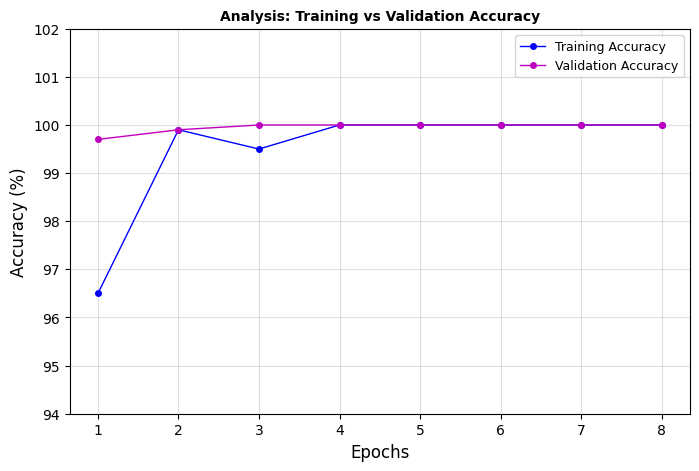

In [76]:
import matplotlib.pyplot as plt

def plot_comparative(epochs, train_acc, val_acc, title="Training vs Validation Accuracy"):
    plt.figure(figsize=(8, 5))
    
    # Plotear ambas curvas
    plt.plot(epochs, train_acc, 'b-o', label='Training Accuracy', linewidth=1, markersize=4)
    plt.plot(epochs, val_acc, 'm-o', label='Validation Accuracy', linewidth=1, markersize=4)
    
    # Configuración del gráfico
    plt.title(title, fontsize=10, fontweight='bold')
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Accuracy (%)', fontsize=12)
    plt.legend(fontsize=9)
    plt.grid(True, alpha=0.4)
    plt.ylim(94, 102)  # Rango (y) apropiado para nuestros datos
        
    # plt.tight_layout()
    plt.show()

# Ejecutar visualización
plot_comparative(epochs_list, train_accuracies, validation_accuracies, 
                "Analysis: Training vs Validation Accuracy")

In [ ]:
# Datos de Loss extraídos de los outputs del entrenamiento (8 épocas totales)

train_losses = [0.173987, 0.004813, 0.014586, 0.000573, 0.000171, 0.000526, 0.000096, 0.000063]
val_losses = [0.015715, 0.002420, 0.000325, 0.000104, 0.000051, 0.000068, 0.000034, 0.000019]

print("Datos de Loss del entrenamiento:")
print(f"Épocas: {epochs_list}")
print(f"Train Loss: {train_losses}")
print(f"Validation Loss: {val_losses}")

Datos de Loss del entrenamiento:
Épocas: [1, 2, 3, 4, 5, 6, 7, 8]
Train Loss: [0.173987, 0.004813, 0.014586, 0.000573, 0.000171, 0.000526, 9.6e-05, 6.3e-05]
Validation Loss: [0.015715, 0.00242, 0.000325, 0.000104, 5.1e-05, 6.8e-05, 3.4e-05, 1.9e-05]


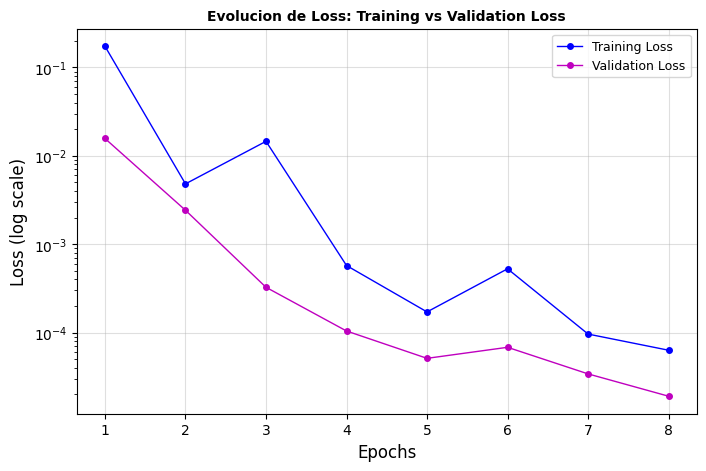

In [ ]:
def plot_loss_comparative(epochs, train_loss, val_loss, title="Training vs Validation Loss"):
    plt.figure(figsize=(8, 5))
    
    # Plotear ambas curvas
    plt.plot(epochs, train_loss, 'b-o', label='Training Loss', linewidth=1, markersize=4)
    plt.plot(epochs, val_loss, 'm-o', label='Validation Loss', linewidth=1, markersize=4)
    
    # Configuración del gráfico
    plt.title(title, fontsize=10, fontweight='bold')
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Loss (log scale)', fontsize=12)
    plt.legend(fontsize=9)
    plt.grid(True, alpha=0.4)
    # plt.ylim(-2, 1) no funciona bien
    plt.yscale('log')  # Escala logarítmica para loss
        
    # plt.tight_layout()
    plt.show()

# Ejecutar visualización de loss
plot_loss_comparative(epochs_list, train_losses, val_losses, 
                     "Evolucion de Loss: Training vs Validation Loss")

### Observaciones Finales

<table>
<tr><td>

#### Como he dicho anteriormente la evolución de `Loss` es impresionante. Está a niveles muy bajos, y continua en descenso progresivo de forma estable. También el loss de Val está siempre por debajo del loss del Train y eso es otra buena señal de ser un traing óptimo, por no decir excelente.

#### El `Accuracy` llega a una convergencia a partir de las épocas 2-4. El `Loss` alcanza convergencia en las últimas épocas. 
(Un dato interesante es que que cuando el ``Accuracy`` y `Loss` se estabilizan y dejan de subir o bajar. Esto nos indica que el modelo deja de aprender. Y se describe como una convergencia.)

#### Parece que he acertado al escoger el modelo MobileNetV3. Poco me esperaba yo que obtendría este resultado.

#### En otro ángulo, en una perspectiva más profesional, he visto que hay mas cosas como por ejemplo codigo que se puede ejecutar al final de todo este proceso, por ejemplo un test de confusión, el cual mostraría cuantas veces se confunde el modelo. Esto sería de utilidad para identificar las clases más problemáticas, analizar sesgos del modelo, etc. Pero vamos, entiendo que esto es para un estudiante de master de Deep Learning. 😉

</td></tr></table>


## Doy por terminada esta práctica 👍